In [17]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress

In [21]:
# Define dataset
filenames = [
    ('vormittags', 'data/VAC1 - V6 - p_H(p_V).csv'),
    ('nachmittags', 'data/Messwerte Richard VAK1 - Kompressionverhältnis Turbomolekular.csv')
]

# Define final pressures for pre- and high vacuum [mbar]
p_V0 = 2e-3
p_H0 = 5e-8

Dataset vormittags: R-value: 0.9998668839235084
Dataset nachmittags: R-value: 0.998811152651425


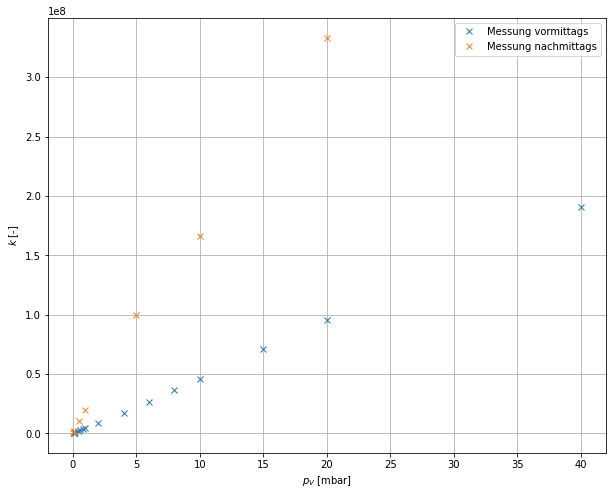

In [22]:
# Create a plot
fig, ax = plt.subplots(figsize=[10,8])
ax.grid()
#ax.set_xscale('log')
ax.set_xlabel('$p_V$ [mbar]')
#ax.set_yscale('log')
ax.set_ylabel('$k$ [-]')

for dataset, filename in filenames:
    # Load the data
    p_V, p_H = np.loadtxt(
        fname=filename,
        delimiter=',',
        unpack=True,
        skiprows=1
    )

    # Compute the compression ratio
    k = (p_V - p_V0) / (p_H - p_H0)

    # Compute correlation coefficient
    _, _, r, _, _ = linregress(p_V, k)
    print(f"Dataset {dataset}: R-value: {r}")

    # Plot measurement data
    ax.plot(p_V, k, 'x', label=f'Messung {dataset}')

    ax.legend()


fig.savefig('figs/aufgabe3.pdf', bbox_inches='tight')